Question 1: What are Type I and Type II errors in hypothesis testing, and how do they impact decision-making?

Answer:

Type I error (α, false positive): Rejecting the null hypothesis $H_0$ when it is actually true. Probability = significance level $α$ (e.g., 0.05). Example: Concluding a drug is effective when it is not.
Type II error (β, false negative): Failing to reject $H_0$ when it is false. Probability = $β$. Power = $1 - β$. Example: Concluding a drug is ineffective when it is effective.

Impact on decision-making:

Type I error leads to false alarms (e.g., unnecessary treatment, false conviction in court). Controlled by setting low $α$.
Type II error leads to missed opportunities (e.g., ignoring a beneficial drug). Reduced by increasing sample size, effect size, or $α$.
Trade-off: Lowering $α$ increases $β$, and vice versa. Choose $α$ based on consequences (e.g., medical trials prioritize low Type I; screening tests prioritize low Type II).

Question 2: What is the P-value in hypothesis testing, and how should it be interpreted in the context of the null hypothesis?

Answer:
The p-value is the probability of observing a test statistic as extreme as (or more extreme than) the one obtained, assuming the null hypothesis $H_0$ is true.
Interpretation:

Small p-value (≤ α, e.g., 0.05): Strong evidence against $H_0$ → reject $H_0$.
Large p-value (> α): Insufficient evidence to reject $H_0$ → fail to reject $H_0$.

Key points:

p-value is not the probability that $H_0$ is true.
It measures compatibility of data with $H_0$.
Always report with context: "p = 0.03 suggests evidence against $H_0$ at α = 0.05, but does not prove the alternative."
Misuse: p < 0.05 ≠ "significant discovery"; consider effect size and practical relevance.

Question 3: Explain the difference between a Z-test and a T-test, including when to use each.

Answer: The Z-test and T-test are both statistical tools used to determine whether a sample mean significantly differs from a hypothesized population mean in hypothesis testing, but they differ primarily in their assumptions about the population variance and sample size. A Z-test is appropriate when the population standard deviation ($\sigma$) is known or when the sample size is large ($n \geq 30$), allowing the Central Limit Theorem to ensure the sampling distribution of the mean is approximately normal; it uses the standard normal distribution and the test statistic is calculated as $z = \frac{\bar{x} - \mu_0}{\sigma / \sqrt{n}}$.

In contrast, a T-test is used when the population standard deviation is unknown and must be estimated from the sample ($s$), especially with small sample sizes ($n < 30$); it relies on the t-distribution, which has heavier tails to account for added uncertainty, with the test statistic $t = \frac{\bar{x} - \mu_0}{s / \sqrt{n}}$ and degrees of freedom $n-1$. In practice, use a Z-test in scenarios like quality control with historical variance data or large-scale surveys, while a T-test is ideal for small experiments, pilot studies, or any research where variance is estimated from the sample itself. For very large samples, the t-distribution approaches the normal, making the two tests nearly equivalent.

Question 4: What is a confidence interval, and how does the margin of error influence its width and interpretation?

Answer : A confidence interval (CI) is a range around a sample estimate (e.g., mean) likely to contain the true population parameter at a given confidence level (e.g., 95%). It provides not just a point estimate but an interval that reflects the uncertainty inherent in sampling, offering a more informative summary than a single value. The interval is constructed around the sample estimate (e.g., sample mean $\bar{x}$) and consists of a lower and upper bound, expressed as $\bar{x} \pm \text{margin of error}$. It is calculated as: estimate ± margin of error (MOE).
The MOE = critical value × standard error.

Wider MOE → wider CI → less precision
Influenced by:
↑ confidence level → wider CI
↑ variability → wider CI
↑ sample size → narrower CI

Interpretation: We are 95% confident the true value lies in the interval. Narrower CIs indicate more precise estimates.

Question 5: Describe the purpose and assumptions of an ANOVA test. How does it extend hypothesis testing to more than two groups?

Answer:

Purpose:
ANOVA (Analysis of Variance) tests whether there are statistically significant differences between the means of three or more independent groups.
Null Hypothesis: $H_0: \mu_1 = \mu_2 = \dots = \mu_k$
Alternative: At least one mean differs.
Assumptions:

Independence of observations.
Normality within each group (robust for large n).
Homogeneity of variances (equal σ² across groups) → use Levene’s test; if violated, use Welch’s ANOVA.

Extension beyond two groups:

t-test compares 2 means.
ANOVA compares k ≥ 3 means simultaneously.
Avoids multiple t-tests (inflates Type I error via α inflation).
If ANOVA rejects $H_0$, use post-hoc tests (e.g., Tukey’s HSD) to identify which pairs differ.

In [1]:
#Question 6: Write a Python program to perform a one-sample Z-test and interpret the result for a given dataset.

import numpy as np
from scipy import stats

# Sample data
data = np.array([23, 25, 28, 22, 26, 24, 27, 29, 25, 23])
mu_0 = 25  # Hypothesized mean
sigma = 3  # Known population std dev
alpha = 0.05

# One-sample Z-test
n = len(data)
x_bar = np.mean(data)
se = sigma / np.sqrt(n)
z_stat = (x_bar - mu_0) / se
p_value = 2 * (1 - stats.norm.cdf(abs(z_stat)))  # two-tailed

print(f"Sample mean: {x_bar:.2f}")
print(f"Z-statistic: {z_stat:.4f}")
print(f"P-value: {p_value:.4f}")

if p_value < alpha:
    print(f"Reject H0 at α = {alpha}: Evidence that mean ≠ {mu_0}")
else:
    print(f"Fail to reject H0: Insufficient evidence that mean ≠ {mu_0}")

Sample mean: 25.20
Z-statistic: 0.2108
P-value: 0.8330
Fail to reject H0: Insufficient evidence that mean ≠ 25


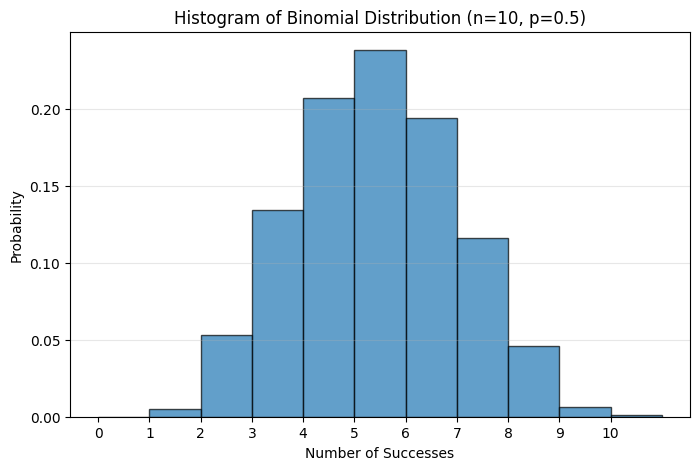

In [2]:
#Question 7: Simulate a dataset from a binomial distribution (n = 10, p = 0.5) using NumPy and plot the histogram.

import numpy as np
import matplotlib.pyplot as plt

# Simulate binomial data
np.random.seed(42)
n, p = 10, 0.5
data = np.random.binomial(n, p, size=1000)

# Plot histogram
plt.figure(figsize=(8, 5))
plt.hist(data, bins=range(0, 12), edgecolor='black', alpha=0.7, density=True)
plt.title('Histogram of Binomial Distribution (n=10, p=0.5)')
plt.xlabel('Number of Successes')
plt.ylabel('Probability')
plt.xticks(range(0, 11))
plt.grid(axis='y', alpha=0.3)
plt.show()

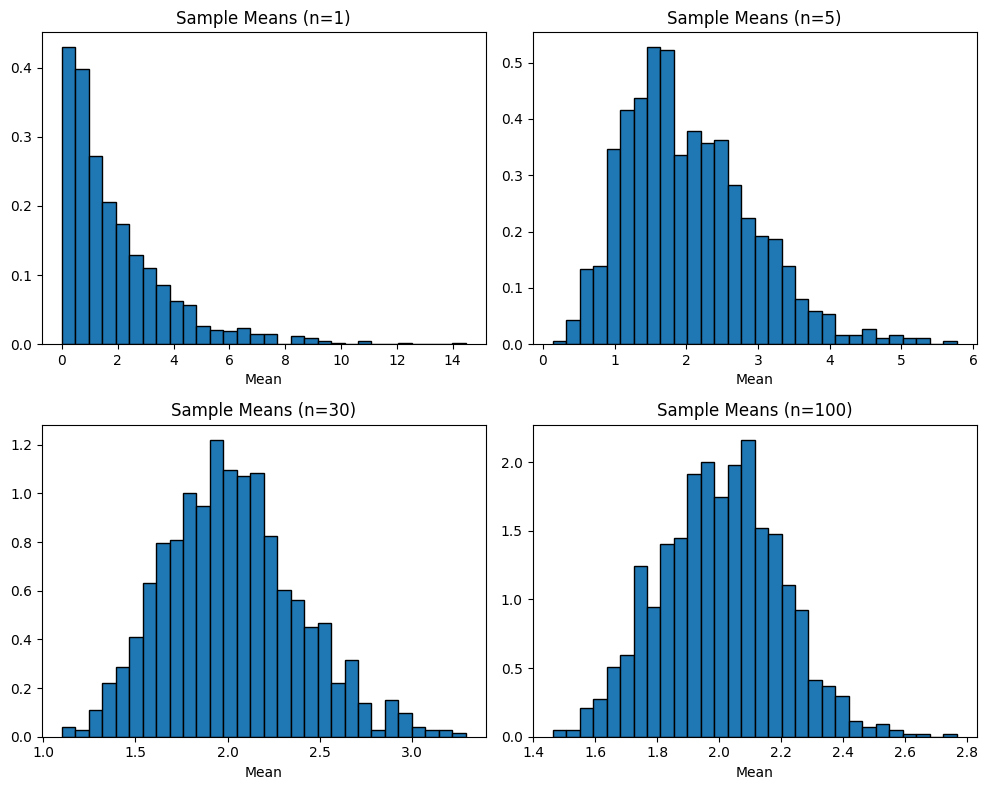

In [3]:
#Question 8: Generate multiple samples from a non-normal distribution and implement the Central Limit Theorem using Python.

import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
population = np.random.exponential(scale=2, size=100000)  # Skewed

sample_sizes = [1, 5, 30, 100]
means = {n: [] for n in sample_sizes}

for n in sample_sizes:
    for _ in range(1000):
        sample = np.random.choice(population, size=n)
        means[n].append(np.mean(sample))

# Plot
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
axes = axes.ravel()
for i, n in enumerate(sample_sizes):
    axes[i].hist(means[n], bins=30, edgecolor='black', density=True)
    axes[i].set_title(f'Sample Means (n={n})')
    axes[i].set_xlabel('Mean')
plt.tight_layout()
plt.show()

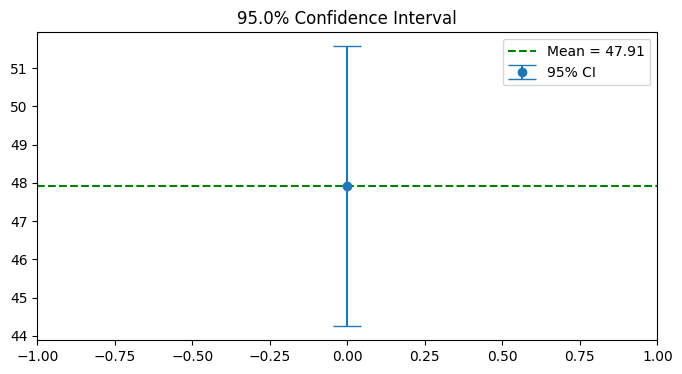

Mean: 47.91, CI: [44.25, 51.57]


In [4]:
#Question 9: Write a Python function to calculate and visualize the confidence interval for a sample mean.

import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

def plot_ci(data, confidence=0.95):
    n = len(data)
    mean = np.mean(data)
    sem = stats.sem(data)
    ci = stats.t.interval(confidence, df=n-1, loc=mean, scale=sem)

    plt.figure(figsize=(8, 4))
    plt.errorbar(0, mean, yerr=[[mean-ci[0]], [ci[1]-mean]], fmt='o', capsize=10, label='95% CI')
    plt.axhline(mean, color='green', linestyle='--', label=f'Mean = {mean:.2f}')
    plt.xlim(-1, 1)
    plt.title(f'{confidence*100}% Confidence Interval')
    plt.legend()
    plt.show()

    print(f"Mean: {mean:.2f}, CI: [{ci[0]:.2f}, {ci[1]:.2f}]")

# Example
data = np.random.normal(50, 10, 30)
plot_ci(data)

In [5]:
#Question 10: Perform a Chi-square goodness-of-fit test using Python to compare observed and expected distributions, and explain the outcome.

import numpy as np
from scipy import stats

# Observed frequencies (e.g., die rolls)
observed = np.array([15, 20, 18, 22, 12, 13])  # 100 rolls
expected = np.array([100/6] * 6)  # Fair die

chi2, p = stats.chisquare(observed, expected)

print(f"Chi-square statistic: {chi2:.4f}")
print(f"P-value: {p:.4f}")

if p < 0.05:
    print("Reject H0: Die is not fair.")
else:
    print("Fail to reject H0: No evidence die is unfair.")

Chi-square statistic: 4.7600
P-value: 0.4459
Fail to reject H0: No evidence die is unfair.
